In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating Dataframes by Loading CSV Files

In [2]:
df_humaneval_x = pd.read_csv('measurements_humaneval_x.csv')
df_humaneval_x.head()

,LLM,Benchmark prompt,Execution time (s),CPU Energy (J),RAM Energy (J),GPU Energy (J),CPU Power (W),RAM Power (W),GPU Power (W),CO2 emissions (Kg),CO2 emissions rate (Kg/s),HumanEval-X pass@1
0,llama-2-7b.Q2_K,CPP/0,21.097517,474.683629,122.223978,255.036204,22.5,5.794222,2.080334,0.000052,2.457120e-06,0.006098
1,llama-2-7b.Q2_K,CPP/1,62.684144,1410.372684,344.120273,-17.513014,22.5,5.794222,2.316614,0.000106,1.686102e-06,0.006098
2,llama-2-7b.Q2_K,CPP/2,12.251260,275.645653,60.347804,-297.584238,22.5,5.794222,28.570369,0.000002,1.907662e-07,0.006098
3,llama-2-7b.Q2_K,CPP/3,61.631703,1386.691316,426.471526,-109.179087,22.5,5.794222,0.000000,0.000104,1.682318e-06,0.006098
4,llama-2-7b.Q2_K,CPP/4,26.387190,593.704117,143.322905,-112.553090,22.5,5.794222,31.300154,0.000038,1.440018e-06,0.006098


### Calculating mean values for HumanEval-X

In [3]:
# Extract keywords from "Benchmark prompt"
df_humaneval_x['Programming Language'] = df_humaneval_x['Benchmark prompt'].str.extract(r'([A-Za-z]+)')
df_humaneval_x['Programming Language'].unique()

array(['CPP', 'Go', 'Java', 'JavaScript', 'Python'], dtype=object)

In [4]:
# Define a custom function to remove outliers and specified number of best and worst entries
def remove_extremes(group, n):
    sorted_group = group.sort_values(by='CPU Energy (J)')
    trimmed_group = sorted_group.iloc[n:-n]  # Remove the specified number of best and worst entries
    return trimmed_group

# Grouping by 'LLM' and 'Programming Language' and applying the custom function
n_outliers = 3  # Number of outliers to remove
cleaned_df_humaneval_x = df_humaneval_x.groupby(['LLM', 'Programming Language'], group_keys=False).apply(remove_extremes, n=n_outliers).reset_index(drop=True)

cleaned_df_humaneval_x['Programming Language'] = cleaned_df_humaneval_x['Programming Language'].replace('CPP', 'C++')

# Calculating the mean values for 'CPU Energy (J)' and 'HumanEval-X' after removing extremes
mean_cleaned_df_humaneval_x = cleaned_df_humaneval_x.groupby(['LLM', 'Programming Language']).agg(
    {
        'CPU Energy (J)': 'mean', 
        'Execution time (s)': 'mean', 
        'HumanEval-X pass@1': 'mean'
    }).reset_index()

# Renaming the columns for clarity
mean_cleaned_df_humaneval_x.columns = ['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)', 'HumanEval-X pass@1']
mean_cleaned_df_humaneval_x


,LLM,Programming Language,CPU Energy (J),Execution time (s),HumanEval-X pass@1
0,llama-2-7b.Q2_K,C++,1021.110587,45.383387,0.006098
1,llama-2-7b.Q2_K,Go,875.136893,38.895576,0.000000
2,llama-2-7b.Q2_K,Java,997.017385,44.312580,0.000000
3,llama-2-7b.Q2_K,JavaScript,910.354301,40.460810,0.024390
4,llama-2-7b.Q2_K,Python,863.934515,38.397681,0.054878
5,llama-2-7b.Q3_K_L,C++,1192.308960,52.992338,0.006098
6,llama-2-7b.Q3_K_L,Go,990.797149,44.036112,0.000000
7,llama-2-7b.Q3_K_L,Java,1217.004971,54.089957,0.000000
8,llama-2-7b.Q3_K_L,JavaScript,1000.621050,44.472734,0.042683
9,llama-2-7b.Q3_K_L,Python,906.935535,40.308876,0.103659


### HumanEval-x graphs

In [5]:
mean_cleaned_df_humaneval_x

,LLM,Programming Language,CPU Energy (J),Execution time (s),HumanEval-X pass@1
0,llama-2-7b.Q2_K,C++,1021.110587,45.383387,0.006098
1,llama-2-7b.Q2_K,Go,875.136893,38.895576,0.000000
2,llama-2-7b.Q2_K,Java,997.017385,44.312580,0.000000
3,llama-2-7b.Q2_K,JavaScript,910.354301,40.460810,0.024390
4,llama-2-7b.Q2_K,Python,863.934515,38.397681,0.054878
5,llama-2-7b.Q3_K_L,C++,1192.308960,52.992338,0.006098
6,llama-2-7b.Q3_K_L,Go,990.797149,44.036112,0.000000
7,llama-2-7b.Q3_K_L,Java,1217.004971,54.089957,0.000000
8,llama-2-7b.Q3_K_L,JavaScript,1000.621050,44.472734,0.042683
9,llama-2-7b.Q3_K_L,Python,906.935535,40.308876,0.103659


#### Energy

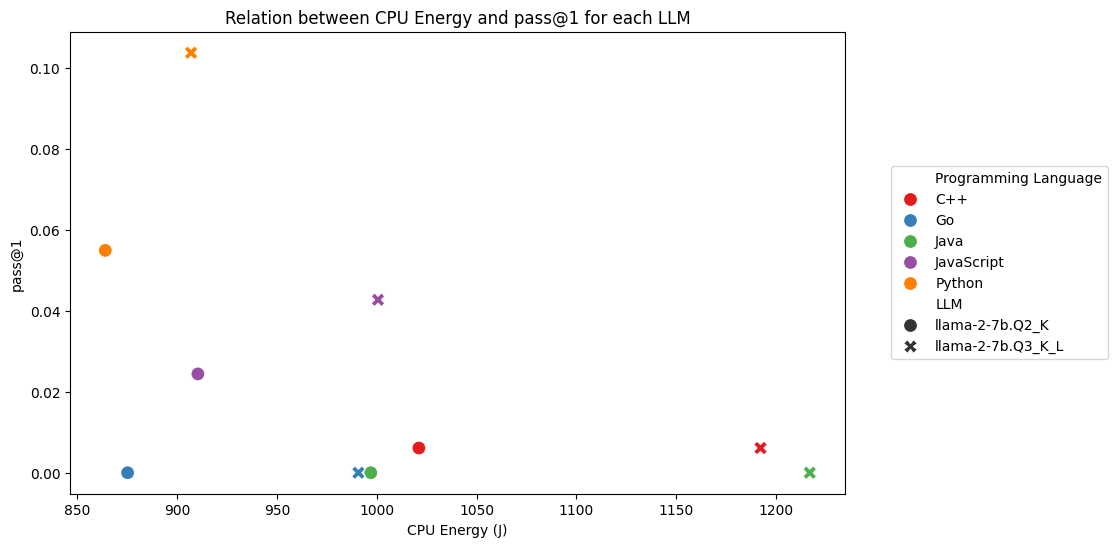

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(data=mean_cleaned_df_humaneval_x, x='CPU Energy (J)', y='HumanEval-X pass@1', hue='Programming Language', style='LLM', palette='Set1', s=100)

plt.title('Relation between CPU Energy and pass@1 for each LLM')
plt.xlabel('CPU Energy (J)')
plt.ylabel('pass@1')

# Posiciona a legenda
scatterplot.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.show()


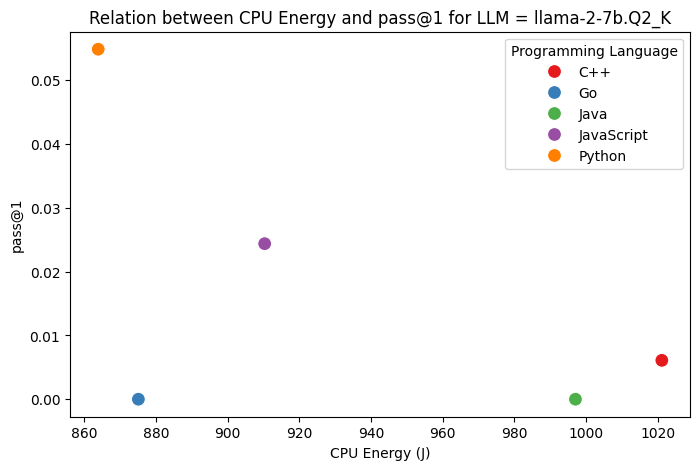

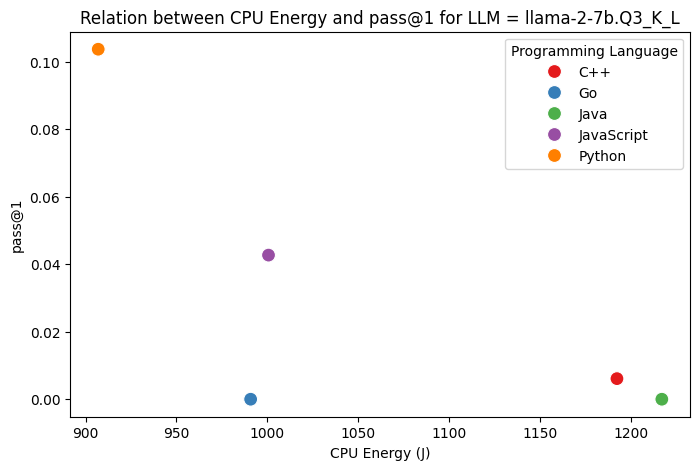

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique values of "LLM"
llm_values = mean_cleaned_df_humaneval_x['LLM'].unique()

# Plot scatterplots for each value of "LLM"
for llm_value in llm_values:
    plt.figure(figsize=(8, 5))
    
    # Filter DataFrame for the current "LLM" value
    df_filtered = mean_cleaned_df_humaneval_x[mean_cleaned_df_humaneval_x['LLM'] == llm_value]
    
    # Create scatterplot
    sns.scatterplot(data=df_filtered, x='CPU Energy (J)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', s=100)
    
    # Set title and labels
    plt.title(f'Relation between CPU Energy and pass@1 for LLM = {llm_value}')
    plt.xlabel('CPU Energy (J)')
    plt.ylabel('pass@1')
    plt.legend(title='Programming Language')
    
    plt.show()


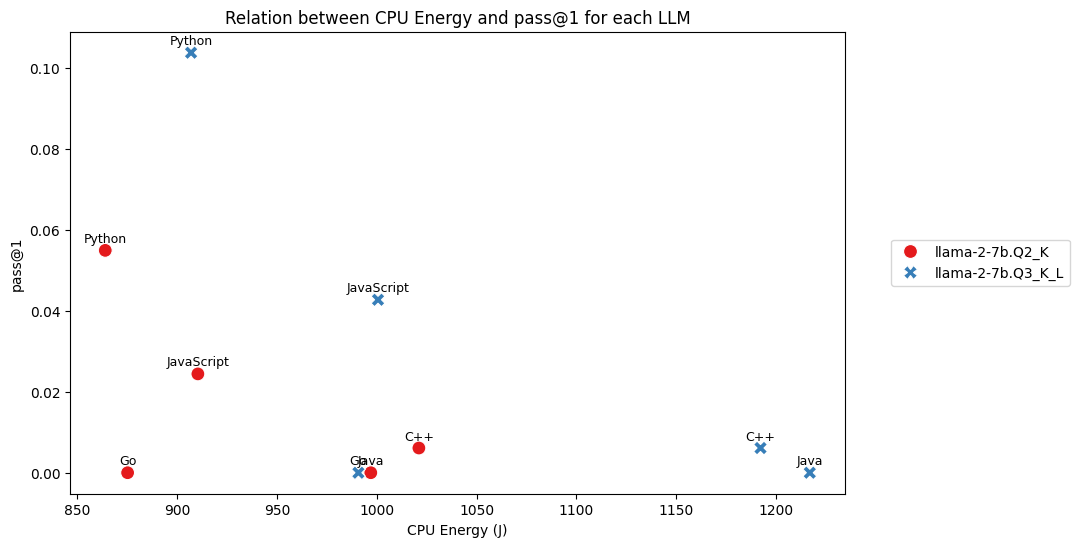

In [8]:
# Criar o gráfico de dispersão com seaborn
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(data=mean_cleaned_df_humaneval_x, x='CPU Energy (J)', y='HumanEval-X pass@1', hue='LLM', style='LLM', palette='Set1', s=100)

# Adicionar rótulos dos pontos com valores de "Programming Language"
for i in range(len(mean_cleaned_df_humaneval_x['LLM'])):
    plt.text(mean_cleaned_df_humaneval_x['CPU Energy (J)'][i], mean_cleaned_df_humaneval_x['HumanEval-X pass@1'][i] + 0.002, 
             mean_cleaned_df_humaneval_x['Programming Language'][i], fontsize=9, ha='center')

# Adicionar título e rótulos dos eixos
plt.title('Relation between CPU Energy and pass@1 for each LLM')
plt.xlabel('CPU Energy (J)')
plt.ylabel('pass@1')

# Posicionar a legenda
scatterplot.legend(title='LLM', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.show()

In [9]:
mean_cleaned_df_humaneval_x

,LLM,Programming Language,CPU Energy (J),Execution time (s),HumanEval-X pass@1
0,llama-2-7b.Q2_K,C++,1021.110587,45.383387,0.006098
1,llama-2-7b.Q2_K,Go,875.136893,38.895576,0.000000
2,llama-2-7b.Q2_K,Java,997.017385,44.312580,0.000000
3,llama-2-7b.Q2_K,JavaScript,910.354301,40.460810,0.024390
4,llama-2-7b.Q2_K,Python,863.934515,38.397681,0.054878
5,llama-2-7b.Q3_K_L,C++,1192.308960,52.992338,0.006098
6,llama-2-7b.Q3_K_L,Go,990.797149,44.036112,0.000000
7,llama-2-7b.Q3_K_L,Java,1217.004971,54.089957,0.000000
8,llama-2-7b.Q3_K_L,JavaScript,1000.621050,44.472734,0.042683
9,llama-2-7b.Q3_K_L,Python,906.935535,40.308876,0.103659


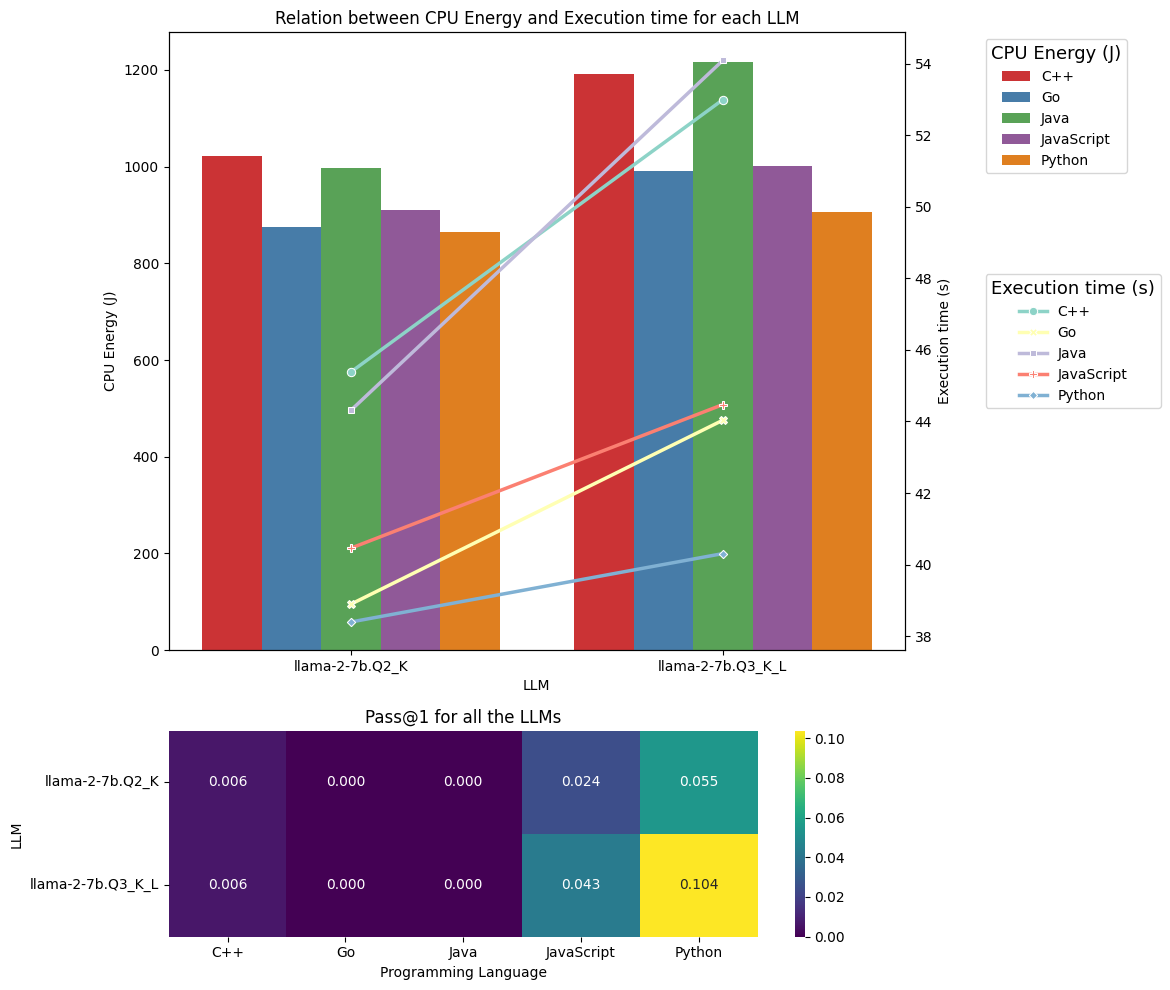

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar a figura e os subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})

# Gráfico de barras para CPU Energy
barplot = sns.barplot(data=mean_cleaned_df_humaneval_x, x='LLM', y='CPU Energy (J)', hue='Programming Language', palette='Set1', ax=ax1)

# Adicionar título e rótulos dos eixos
ax1.set_title('Relation between CPU Energy and Execution time for each LLM')
ax1.set_xlabel('LLM')
ax1.set_ylabel('CPU Energy (J)')

# Adicionar legenda para o gráfico de barras
bar_legend = ax1.legend(title='CPU Energy (J)', bbox_to_anchor=(1.1, 1), loc='upper left')
bar_legend.get_title().set_fontsize('13')

# Criar segundo eixo y para Execution time
ax2_2 = ax1.twinx()
sns.lineplot(data=mean_cleaned_df_humaneval_x, x='LLM', y='Execution time (s)', hue='Programming Language', style='Programming Language', markers=True, dashes=False, linewidth=2.5, palette='Set3', ax=ax2_2)
ax2_2.set_ylabel('Execution time (s)')

# Adicionar legenda para o lineplot
line_legend = ax2_2.legend(title='Execution time (s)', bbox_to_anchor=(1.1, 0.5), loc='center left')
line_legend.get_title().set_fontsize('13')

# Adicionar o heatmap
heatmap_data = mean_cleaned_df_humaneval_x.pivot_table(index='LLM', columns='Programming Language', values='HumanEval-X pass@1')
sns.heatmap(data=heatmap_data, annot=True, cmap='viridis', fmt=".3f", ax=ax2)

# Adicionar título e rótulos dos eixos para o heatmap
ax2.set_title('Pass@1 for all the LLMs')
ax2.set_xlabel('Programming Language')
ax2.set_ylabel('LLM')

plt.tight_layout()

plt.show()


#### Time

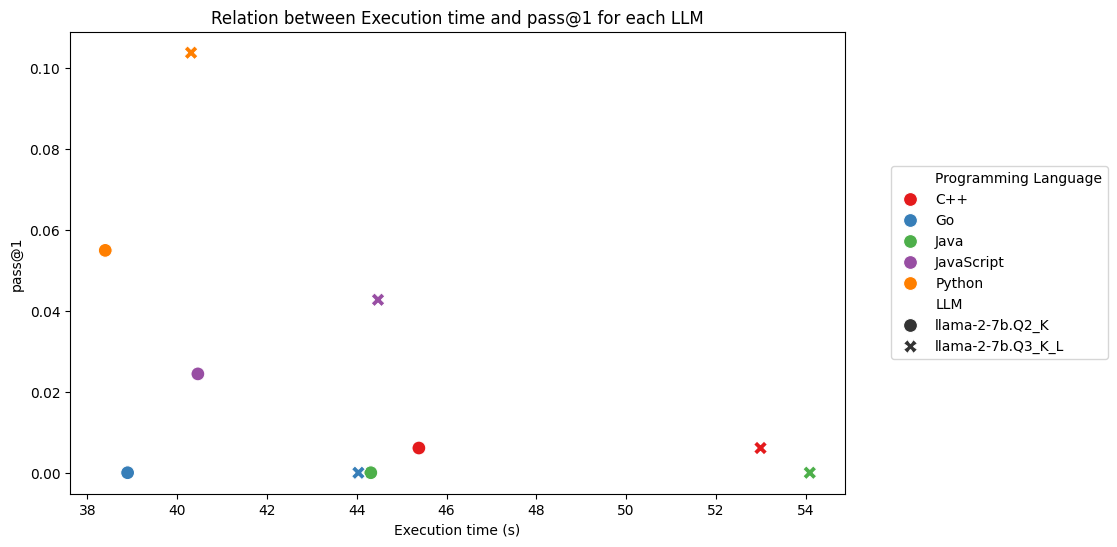

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(data=mean_cleaned_df_humaneval_x, x='Execution time (s)', y='HumanEval-X pass@1', hue='Programming Language', style='LLM', palette='Set1', s=100)

plt.title('Relation between Execution time and pass@1 for each LLM')
plt.xlabel('Execution time (s)')
plt.ylabel('pass@1')

# Posiciona a legenda
scatterplot.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.show()


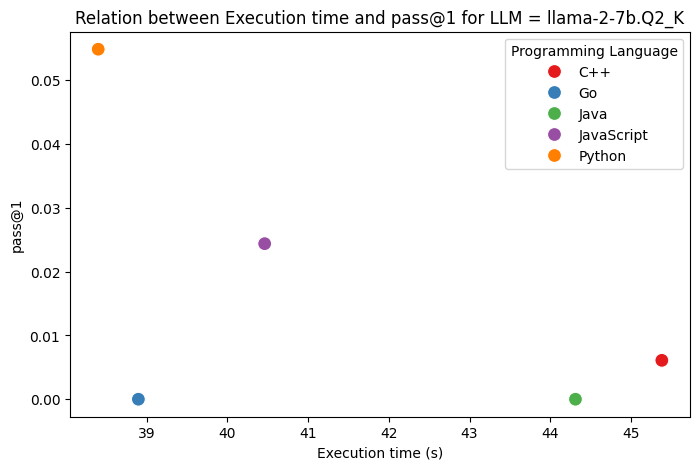

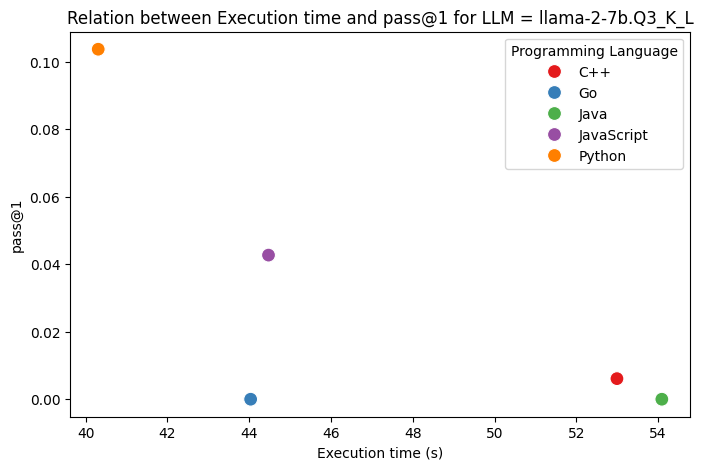

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique values of "LLM"
llm_values = mean_cleaned_df_humaneval_x['LLM'].unique()

# Plot scatterplots for each value of "LLM"
for llm_value in llm_values:
    plt.figure(figsize=(8, 5))
    
    # Filter DataFrame for the current "LLM" value
    df_filtered = mean_cleaned_df_humaneval_x[mean_cleaned_df_humaneval_x['LLM'] == llm_value]
    
    # Create scatterplot
    sns.scatterplot(data=df_filtered, x='Execution time (s)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', s=100)
    
    # Set title and labels
    plt.title(f'Relation between Execution time and pass@1 for LLM = {llm_value}')
    plt.xlabel('Execution time (s)')
    plt.ylabel('pass@1')
    plt.legend(title='Programming Language')
    
    plt.show()


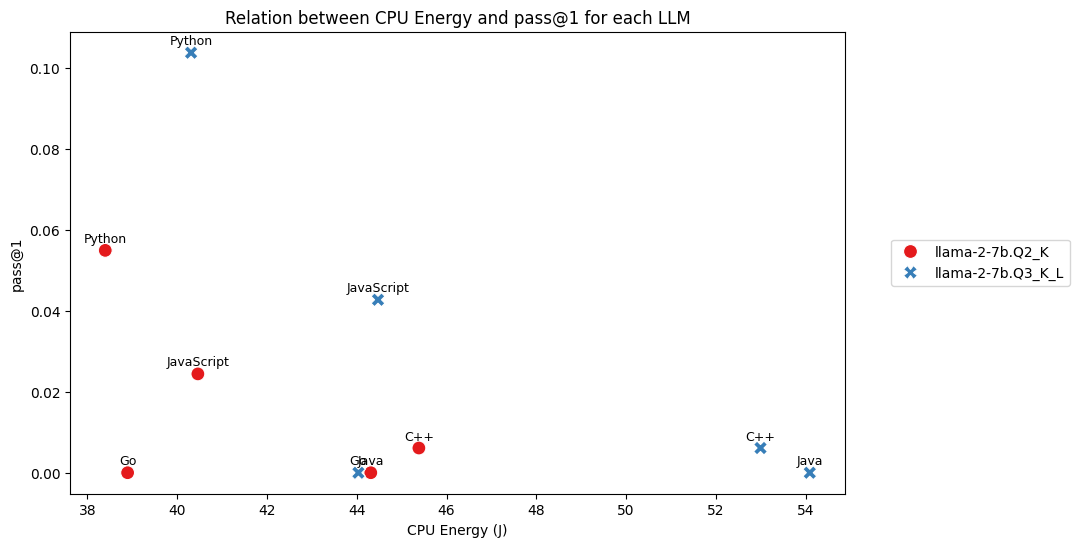

In [13]:
# Criar o gráfico de dispersão com seaborn
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(data=mean_cleaned_df_humaneval_x, x='Execution time (s)', y='HumanEval-X pass@1', hue='LLM', style='LLM', palette='Set1', s=100)

# Adicionar rótulos dos pontos com valores de "Programming Language"
for i in range(len(mean_cleaned_df_humaneval_x['LLM'])):
    plt.text(mean_cleaned_df_humaneval_x['Execution time (s)'][i], mean_cleaned_df_humaneval_x['HumanEval-X pass@1'][i] + 0.002, 
             mean_cleaned_df_humaneval_x['Programming Language'][i], fontsize=9, ha='center')

# Adicionar título e rótulos dos eixos
plt.title('Relation between CPU Energy and pass@1 for each LLM')
plt.xlabel('CPU Energy (J)')
plt.ylabel('pass@1')

# Posicionar a legenda
scatterplot.legend(title='LLM', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.show()